In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [282]:
df =  pd.read_csv('adult 3.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [284]:
df.shape

(48842, 15)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [288]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [290]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [292]:
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [332]:
df.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

In [334]:
df_new = df.dropna()

In [336]:
df_new.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [300]:
df_new.shape

(45222, 15)

In [302]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [304]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [306]:
df_new['income'].unique()

array(['<=50K', '>50K'], dtype=object)

<Axes: xlabel='income'>

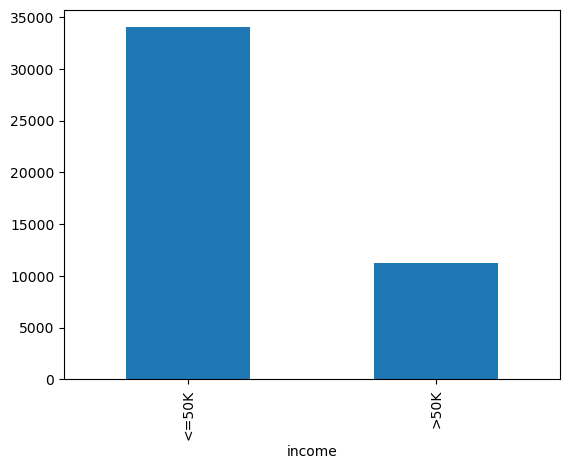

In [308]:
df_new['income'].value_counts().plot(kind='bar')

<Axes: xlabel='income', ylabel='age'>

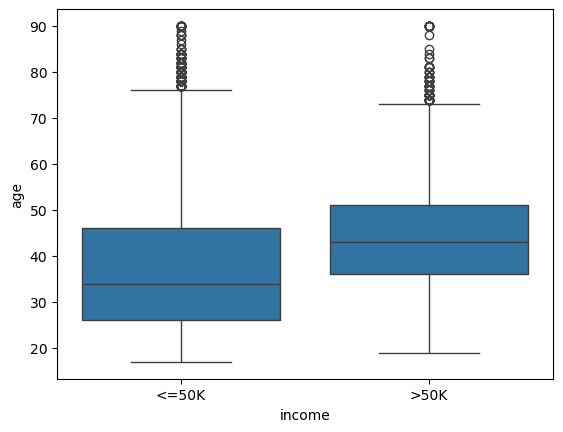

In [310]:
sns.boxplot(x='income', y='age', data=df_new)

<Axes: xlabel='income', ylabel='hours-per-week'>

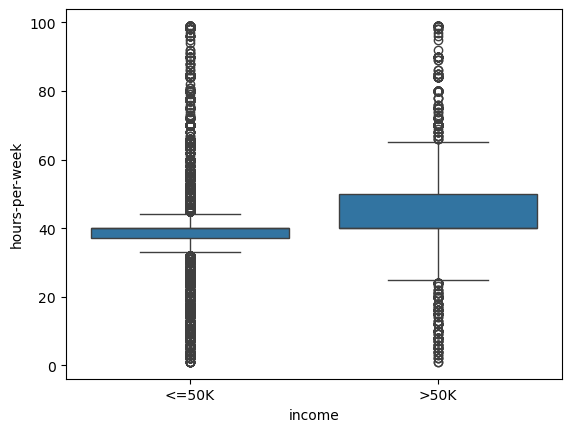

In [312]:
sns.boxplot(x='income', y='hours-per-week', data=df_new)

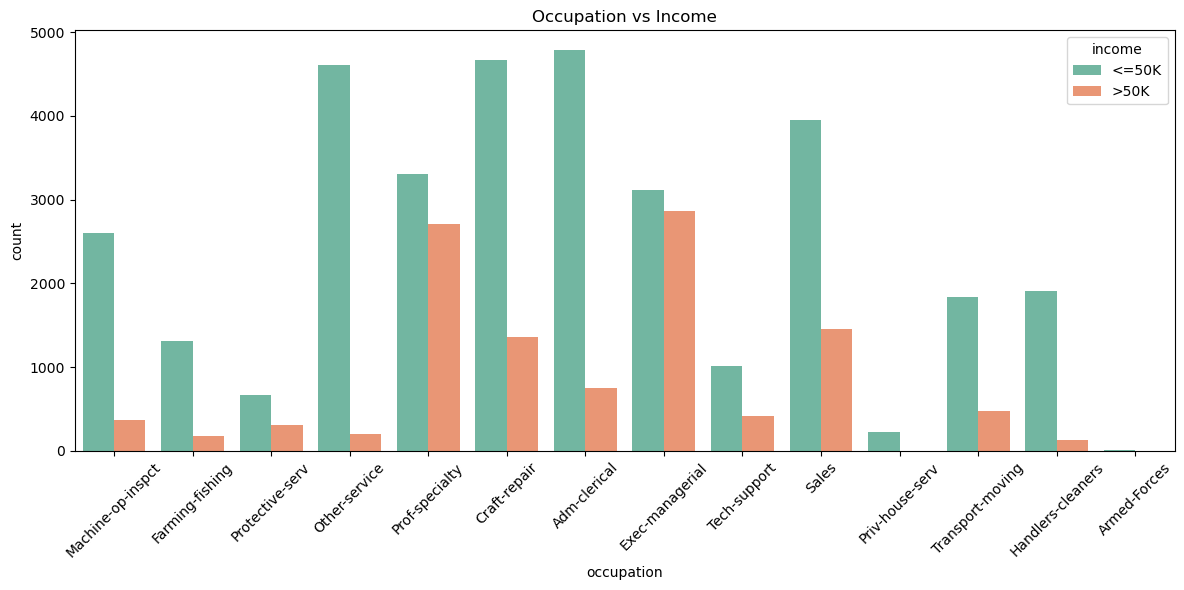

In [314]:
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', hue='income', data=df_new, palette='Set2')
plt.title('Occupation vs Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

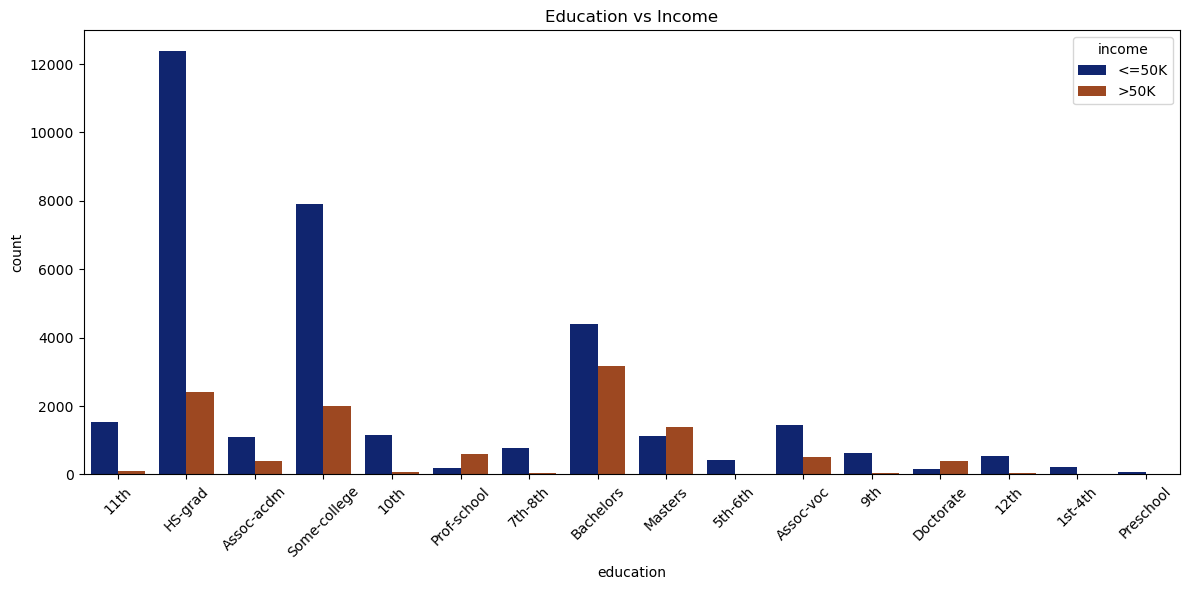

In [316]:
plt.figure(figsize=(12, 6))  # width=12, height=6
sns.countplot(x='education', hue='income', data=df_new, palette='dark')
plt.title('Education vs Income')
plt.xticks(rotation=45)  # optional: rotate x labels for readability
plt.tight_layout()
plt.show()

<Axes: >

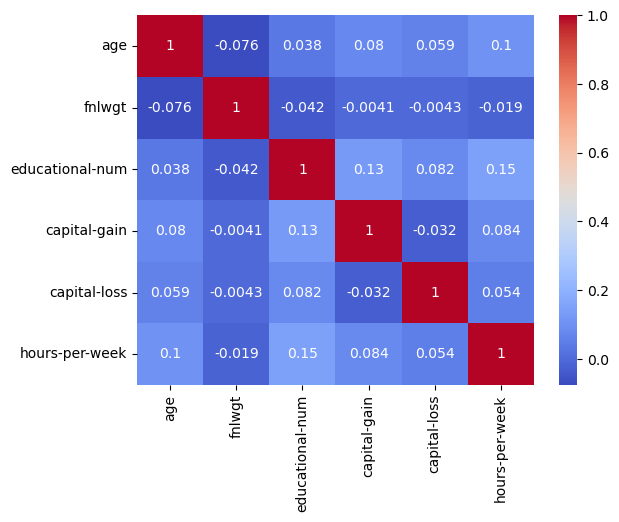

In [318]:
sns.heatmap(df_new.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='age', ylabel='Count'>

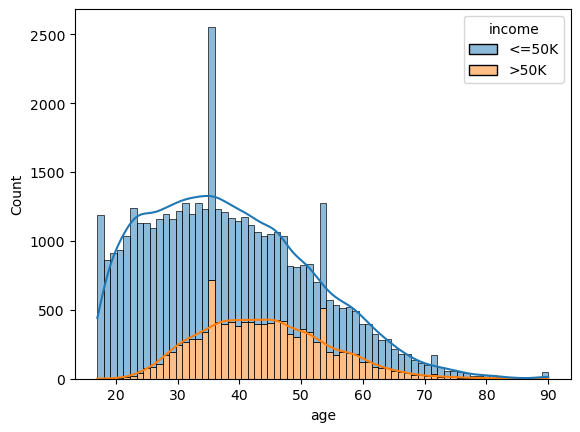

In [320]:
sns.histplot(data=df_new, x='age', hue='income', kde=True, multiple='stack')

In [338]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # to store encoders for decoding later

for col in df_new.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])  # encode in df_new
    label_encoders[col] = le  # store encoder


C:\Users\prabh\AppData\Local\Temp\ipykernel_12300\3884873734.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col] = le.fit_transform(df_new[col])  # encode in df_new
C:\Users\prabh\AppData\Local\Temp\ipykernel_12300\3884873734.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col] = le.fit_transform(df_new[col])  # encode in df_new
C:\Users\prabh\AppData\Local\Temp\ipykernel_12300\3884873734.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [340]:
df_new.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [348]:
X = df_new[['fnlwgt', 'age', 'capital-gain', 'relationship', 'educational-num']]
y = df_new['income']
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_encoded)
X_standardized


array([[ 0.35088942, -1.02498291, -0.1467332 ,  0.99379752, -1.22155881],
       [-0.94587846, -0.04145504, -0.1467332 , -0.88447855, -0.43812161],
       [ 1.39359159, -0.79801494, -0.1467332 , -0.88447855,  0.73703421],
       ...,
       [-0.35805983,  1.47166476, -0.1467332 ,  1.61988954, -0.43812161],
       [ 0.11127873, -1.25195088, -0.1467332 ,  0.99379752, -0.43812161],
       [ 0.92951628,  1.01772882,  1.85477297,  2.24598156, -0.43812161]])

In [346]:
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X_encoded)
X_normalized

array([[0.14443012, 0.10958904, 0.        , 0.6       , 0.4       ],
       [0.05167688, 0.28767123, 0.        , 0.        , 0.53333333],
       [0.21901093, 0.15068493, 0.        , 0.        , 0.73333333],
       ...,
       [0.09372148, 0.56164384, 0.        , 0.8       , 0.53333333],
       [0.12729161, 0.06849315, 0.        , 0.6       , 0.53333333],
       [0.18581726, 0.47945205, 0.1502415 , 1.        , 0.53333333]])

In [350]:
features = ['fnlwgt', 'age', 'capital-gain', 'relationship', 'educational-num','hours-per-week','marital-status','occupation','workclass','capital-loss']

In [352]:
X = df_new[features]
y = df_new['income']

In [354]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top5, y, test_size=0.2, random_state=42)

In [356]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

C:\Users\prabh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:09:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [358]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy with Top 5 Features:", accuracy)

XGBoost Accuracy with Top 5 Features: 0.8703150912106136


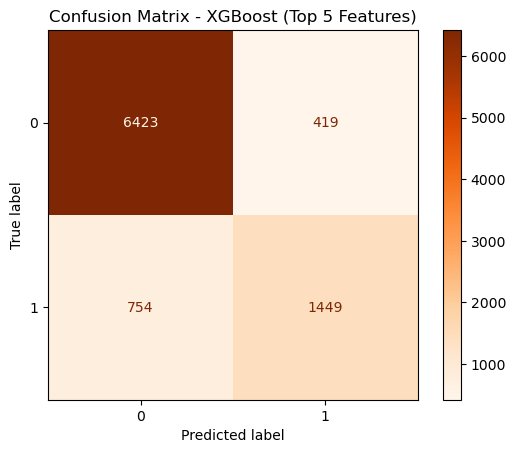

In [360]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix - XGBoost (Top 5 Features)")
plt.show()